In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import requests
import os
from google.colab import userdata

In [2]:
tng_api_key = userdata.get('TNG_API_KEY')
baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key":tng_api_key}

In [3]:
def get(path, params=None, out_filename=None):
    headers = {"api-key":tng_api_key}
    r = requests.get(path, params=params, headers=headers)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically

    if 'content-disposition' in r.headers or out_filename is not None:
        if out_filename is not None:
            filename = out_filename
        else:
            filename = r.headers['content-disposition'].split("filename=")[1]

        with open(filename, 'wb') as f:
            f.write(r.content)
        return filename # return the filename string

    return r

In [4]:
r = get(baseUrl)
for simulation in r['simulations']: #only get TNG50
    if simulation['name'] == 'TNG50-1':
        url = simulation['url']
        break
tng50 = get(url)

In [5]:
url = 'http://www.tng-project.org/api/TNG50-1/snapshots/z=1.8/'
snapshot = get(url)

sub_url = f"http://www.tng-project.org/api/TNG50-1/snapshots/{snapshot['number']}/subhalos/0/"
subhalo = get(sub_url)

In [10]:
vis_query1 = "partField=vmag&ctName=inferno"
vis_query2 = "partField=temp&ctName=viridis"

#getting vmag and temp at different snapshots in a single loop
for i in range(1, 6):
    snapshot_num = 34 + i

    # Download vmag image
    vis_url_vmag = f"http://www.tng-project.org/api/TNG50-1/snapshots/{snapshot_num}/subhalos/0/vis.png?{vis_query1}"
    vis_r_vmag = get(vis_url_vmag, out_filename=f'vmag{i}.png')

    # Download temp image
    vis_url_temp = f"http://www.tng-project.org/api/TNG50-1/snapshots/{snapshot_num}/subhalos/0/vis.png?{vis_query2}"
    vis_r_temp = get(vis_url_temp, out_filename=f'temp{i}.png')

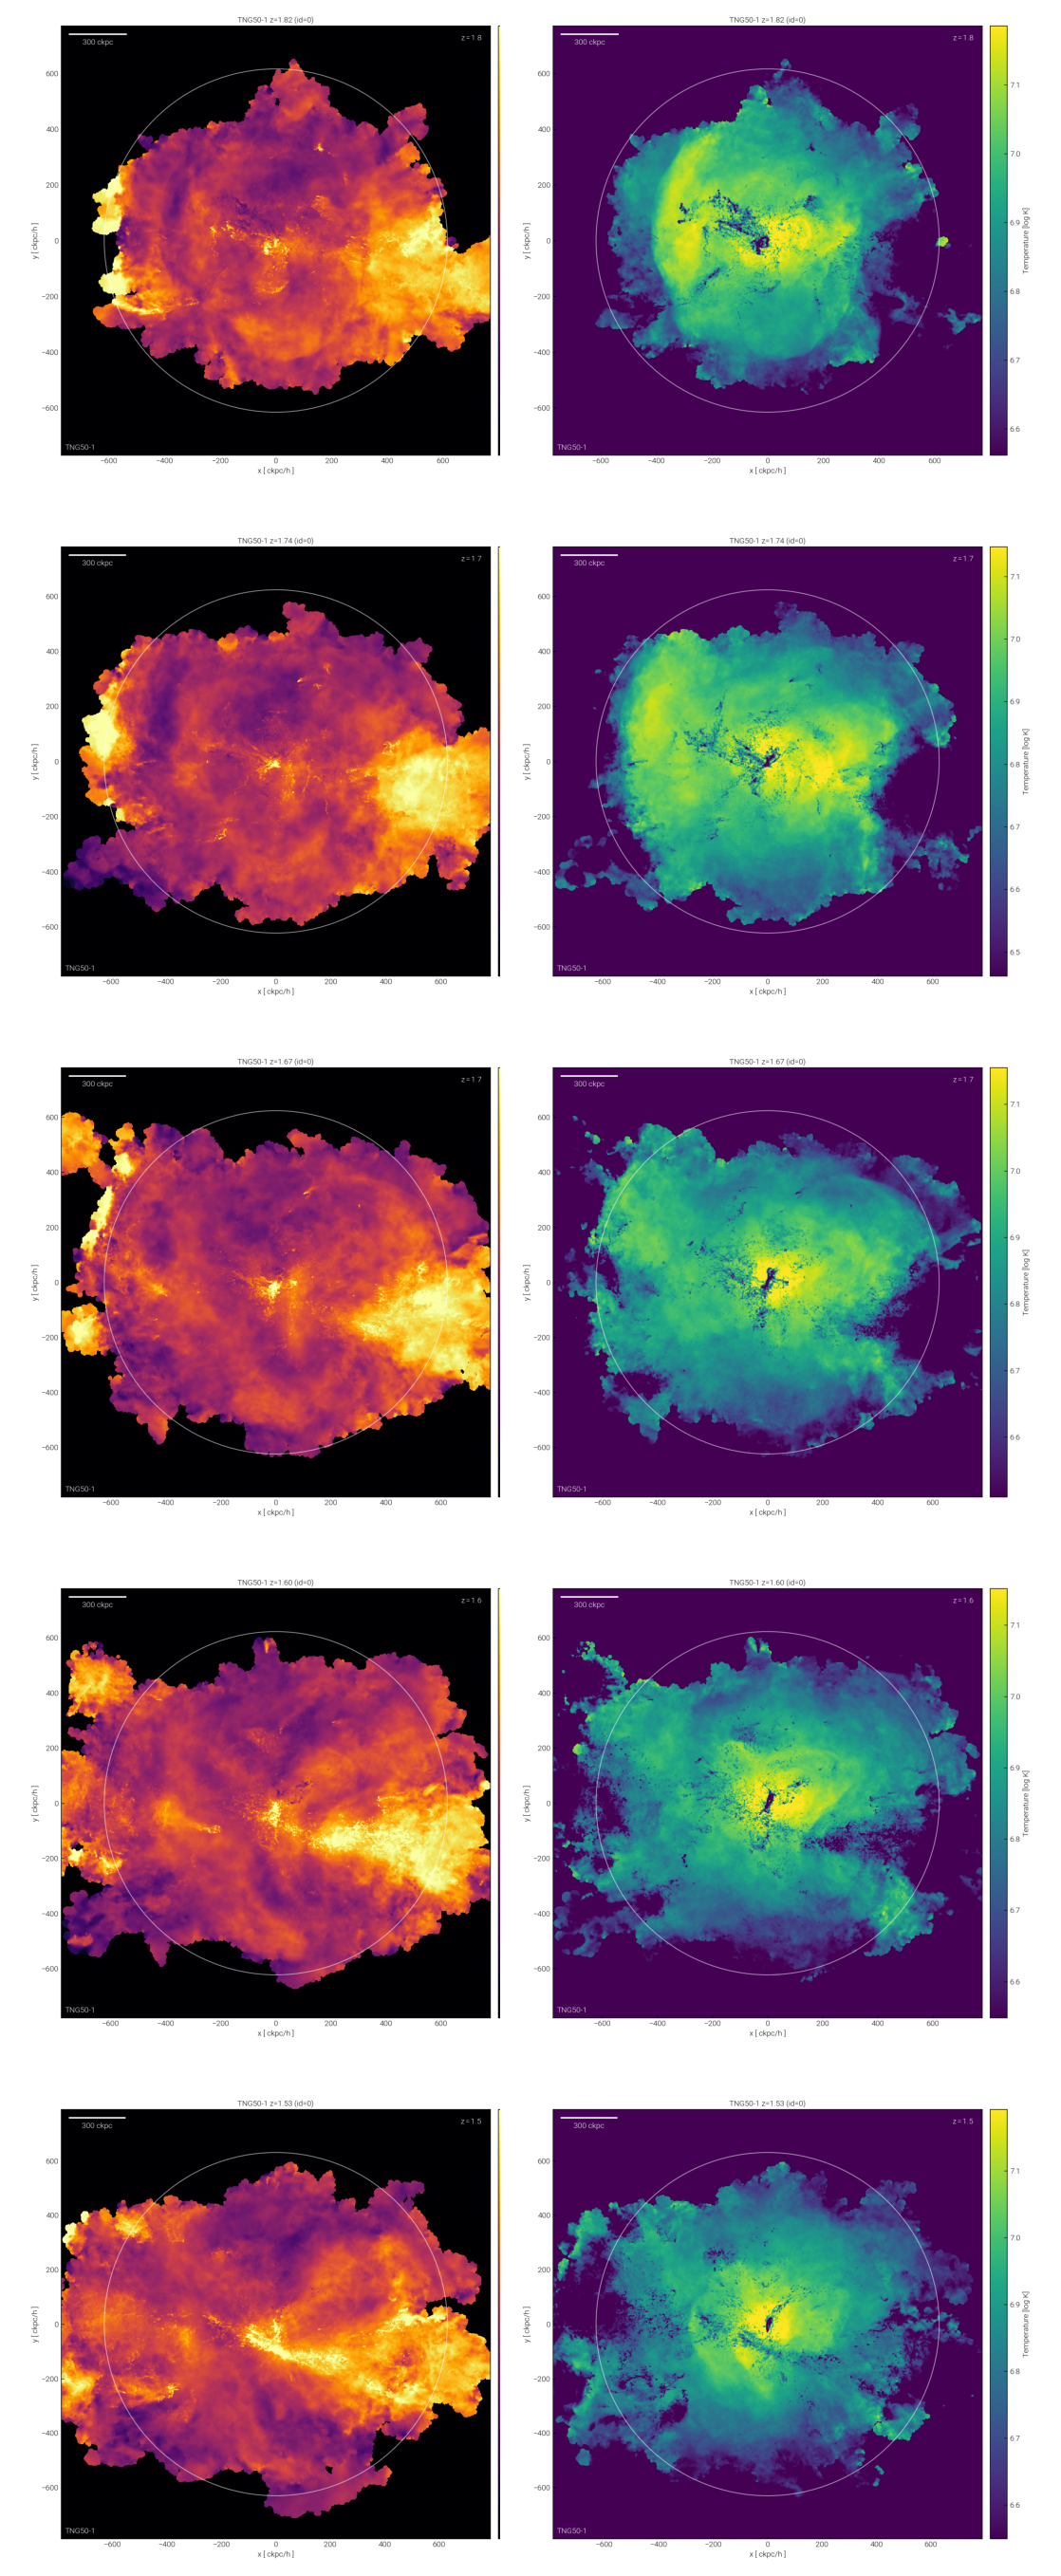

In [21]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(40, 35))
filenames = []
for i in range(1, 6):
    filenames.append(f'vmag{i}.png')
    filenames.append(f'temp{i}.png')

for ax, filename in zip(axes.flatten(), filenames):
    ax.imshow(plt.imread(filename))
    ax.axis('off')
plt.subplots_adjust(wspace=-0.8, hspace=0.1)